Data source: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

In [15]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [17]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
display(df.head(), df.dtypes, df.isnull().any(), df.duplicated())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [18]:
display(df.duplicated().any())

False

In [19]:
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[numerical_columns]
display(X)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.00,160296.36,0.00,0.00
1,1864.28,21249.00,19384.72,0.00,0.00
2,181.00,181.00,0.00,0.00,0.00
3,181.00,181.00,0.00,21182.00,0.00
4,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13
6362616,6311409.28,6311409.28,0.00,0.00,0.00
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,850002.52,850002.52,0.00,0.00,0.00


In [20]:
y = df['isFraud'].astype(int)
display(y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [21]:
# Address class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


--> model is highly accurate due to high dataset imbalance.

### Evaluate the Model on the Correct Target:
Predict the target and evaluate using metrics other than accuracy (due to class imbalance, accuracy alone can be misleading). Use precision, recall, and F1-score to get a better understanding of performance:

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1269605
           1       1.00      1.00      1.00   1272158

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



array([[1263690,    5915],
       [    439, 1271719]])

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [42]:
# create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1263690,    5915],
       [    439, 1271719]])

In [43]:
# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp

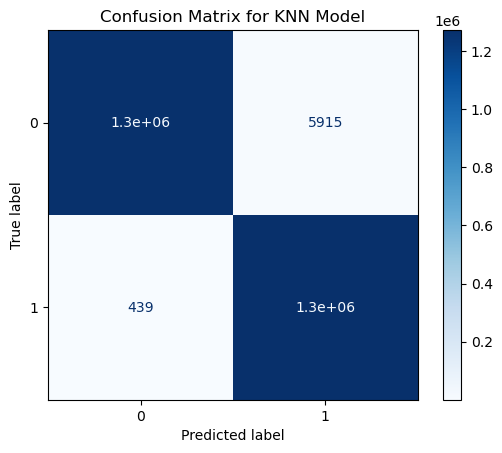

In [44]:
# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Optional: Change the color scheme if needed
plt.title("Confusion Matrix for KNN Model")
plt.show()

In [45]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [46]:
# Get the prediction probabilities
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)
y_prob

array([1., 0., 1., ..., 0., 1., 0.])

In [47]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
precision
recall

array([1.        , 0.99994891, 0.99980977, 0.99965492, 0.99940652,
       0.99847189, 0.        ])

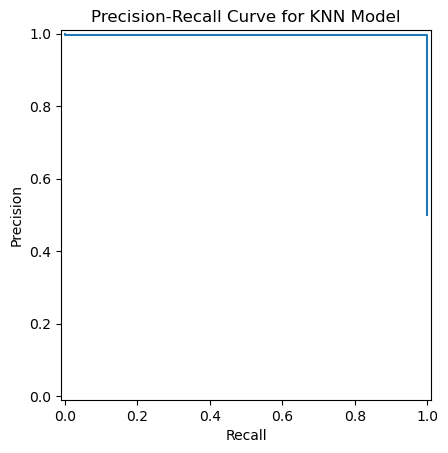

In [48]:
# Display precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve for KNN Model")
plt.show()

In [50]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Get the prediction probabilities
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)
y_prob

array([1., 0., 1., ..., 0., 1., 0.])

In [52]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

In [53]:
# Add a 0 to the end of thresholds to match precision and recall arrays
thresholds = np.append(thresholds, 1)

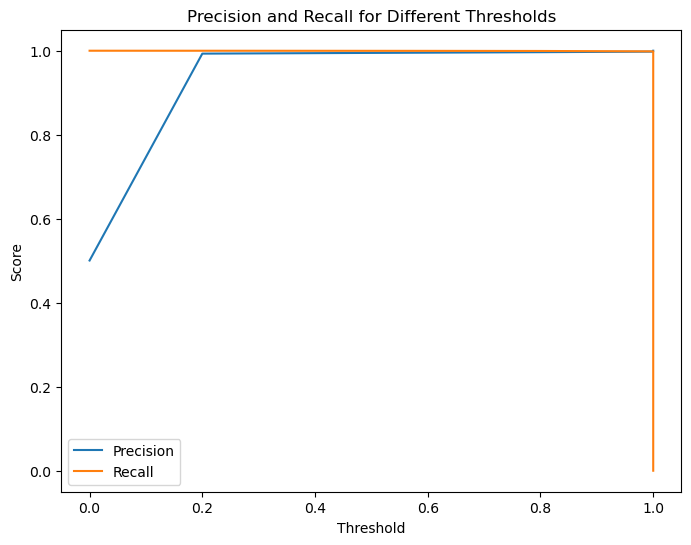

In [54]:
# Plot Precision and Recall against Thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.title("Precision and Recall for Different Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

---

In [57]:
# Set a new threshold for classification
threshold = 0.4

# Apply the threshold to get new predictions
y_pred_threshold = (y_prob >= threshold).astype(int)
y_pred_threshold

print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1269605
           1       0.99      1.00      1.00   1272158

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



In [58]:
# Set a new threshold for classification
threshold = 0.5

# Apply the threshold to get new predictions
y_pred_threshold = (y_prob >= threshold).astype(int)
y_pred_threshold

print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1269605
           1       1.00      1.00      1.00   1272158

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



---